In [7]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim

# Datos

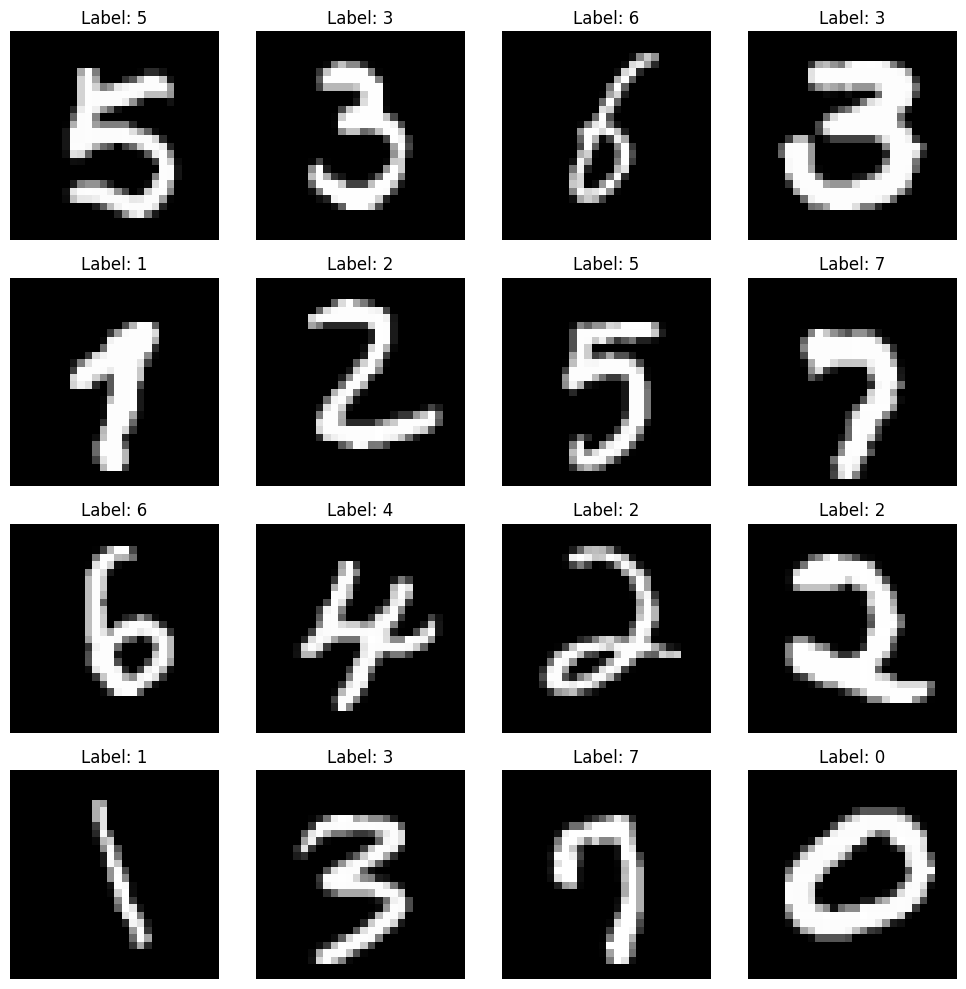

In [20]:

# Load MNIST dataset
# Definimos una secuencia de transformaciones para aplicar a las imágenes del dataset.
# En este caso, solo convertimos las imágenes a tensores utilizando `ToTensor()`.
# Esto es necesario para que las imágenes estén en un formato compatible con PyTorch.
transform = transforms.Compose([
    transforms.ToTensor()  # Convierte la imagen de un formato PIL o numpy.ndarray a un tensor.
])

# Cargamos el dataset MNIST de entrenamiento.
# `root='./data'` especifica el directorio donde se descargarán los datos si no están presentes.
# `train=True` indica que queremos el conjunto de datos de entrenamiento.
# `transform=transform` aplica las transformaciones definidas previamente a cada imagen.
# `download=True` descarga los datos si no están disponibles en el directorio especificado.
mnist_dataset = datasets.MNIST(
    root='./data', train=True, transform=transform, download=True
)

# Creamos un DataLoader que nos permite cargar los datos en lotes pequeños.
# `dataset=mnist_dataset` es el dataset que se cargará.
# `batch_size=16` indica que cada lote contendrá 16 imágenes y etiquetas.
# `shuffle=True` mezcla los datos aleatoriamente en cada época, mejorando la generalización del modelo.
data_loader = DataLoader(
    mnist_dataset, batch_size=16, shuffle=True
)

# Obtenemos un único lote de datos del DataLoader.
# `next(iter(data_loader))` convierte el DataLoader en un iterador y toma el primer lote.
# El lote contiene `images` (los tensores de las imágenes) y `labels` (las etiquetas correspondientes).
images, labels = next(iter(data_loader))


# Plot the images in a grid
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.title(f'Label: {labels[i].item()}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Arquitectura

In [38]:

# Definimos el modelo MLP
# MLP hereda de nn.Module, lo que permite utilizar las funciones y propiedades de PyTorch
# para crear, entrenar y evaluar redes neuronales.
class MLP(nn.Module):
    def __init__(self):
        # Inicializamos la clase base nn.Module
        # Esto habilita funciones esenciales como la gestión de capas y forward pass.
        super(MLP, self).__init__()
        # Capa completamente conectada: de entrada (28x28 píxeles) a 256 neuronas
        self.fc1 = nn.Linear(28 * 28, 256)
        # Capa oculta: de 256 neuronas a 128 neuronas
        self.fc2 = nn.Linear(256, 128)
        # Capa de salida: de 128 neuronas a 64 neuronas
        self.fc3 = nn.Linear(128, 64)
        # Capa oculta: de  64 neuronas a 10 clases (números del 0 al 9)
        self.fc4 = nn.Linear(64, 10)
        # Función de activación LeakyReLU
        self.relu = nn.LeakyReLU() 
        # Dropout para evitar sobreajuste
        self.dropout = nn.Dropout(0.2)

    # Definimos cómo pasa la información a través de la red
    # Este método es obligatorio en las clases que heredan de nn.Module.
    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Aplanamos las imágenes (de 28x28 a 1D)
        x = self.relu(self.fc1(x))  # Aplicamos la primera capa y ReLU
        x = self.dropout(x)         # Aplicamos Dropout
        x = self.relu(self.fc2(x))  # Aplicamos la segunda capa y ReLU
        x = self.dropout(x)         # Aplicamos Dropout
        x = self.fc3(x)             # Aplicamos la capa de salida
        return x

# Entrenamiento

In [45]:
# Hiperparámetros
batch_size = 64       # Tamaño de lote
learning_rate = 0.001 # Tasa de aprendizaje
epochs = 10           # Número de épocas de entrenamiento

# Preprocesamiento y carga de datos de MNIST
transform = transforms.Compose([
    transforms.ToTensor(),                 # Convertimos imágenes a tensores
    transforms.Normalize((0.5,), (0.5,))  # Normalizamos a media 0 y varianza 1
])
train_dataset = datasets.MNIST(
    root='./data', train=True, transform=transform, download=True)  # Dataset de entrenamiento
test_dataset = datasets.MNIST(
    root='./data', train=False, transform=transform, download=True)  # Dataset de prueba
train_loader = DataLoader(
    dataset=train_dataset, batch_size=batch_size, shuffle=True)  # Dataloader para entrenamiento
test_loader = DataLoader(
    dataset=test_dataset, batch_size=batch_size, shuffle=False)  # Dataloader para prueba

# Definimos el modelo, la función de pérdida y el optimizador
model = MLP()                             # Creamos una instancia del modelo MLP
criterion = nn.CrossEntropyLoss()         # Función de pérdida para clasificación
optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # Optimizador Adam

# Bucle de entrenamiento
for epoch in range(epochs):
    model.train()  # Ponemos el modelo en modo entrenamiento
    for images, labels in train_loader:  # Iteramos sobre lotes de datos
        optimizer.zero_grad()            # Reiniciamos los gradientes
        outputs = model(images)          # Hacemos una predicción con el modelo
        loss = criterion(outputs, labels)  # Calculamos la pérdida
        loss.backward()                  # Propagamos los gradientes
        optimizer.step()                 # Actualizamos los pesos del modelo

    # Mostramos la pérdida al final de cada época
    print(f"Época [{epoch+1}/{epochs}], Pérdida: {loss.item():.4f}")



Época [1/10], Pérdida: 0.1937
Época [2/10], Pérdida: 0.1522
Época [3/10], Pérdida: 0.0426
Época [4/10], Pérdida: 0.0614
Época [5/10], Pérdida: 0.2261
Época [6/10], Pérdida: 0.0568
Época [7/10], Pérdida: 0.2170
Época [8/10], Pérdida: 0.1361
Época [9/10], Pérdida: 0.0196
Época [10/10], Pérdida: 0.0375


 # Hiperparámetros prueba 1 activador RelU
batch_size = 64       # Tamaño de lote
learning_rate = 0.001 # Tasa de aprendizaje
epochs = 10           # Número de épocas de entrenamiento
       
       # Capa completamente conectada: de entrada (28x28 píxeles) a 256 neuronas
        self.fc1 = nn.Linear(28 * 28, 256)
        # Capa oculta: de 256 neuronas a 128 neuronas
        self.fc2 = nn.Linear(256, 128)
        # Capa de salida: de 128 neuronas a 10 clases (números del 0 al 9)
        self.fc3 = nn.Linear(128, 10)
        # Función de activación ReLU
        self.relu = nn.ReLU() 

Época [1/10], Pérdida: 0.1294
Época [2/10], Pérdida: 0.0842
Época [3/10], Pérdida: 0.0927
Época [4/10], Pérdida: 0.2387
Época [5/10], Pérdida: 0.0322
Época [6/10], Pérdida: 0.4499
Época [7/10], Pérdida: 0.0506
Época [8/10], Pérdida: 0.0951
Época [9/10], Pérdida: 0.0291
Época [10/10], Pérdida: 0.0195

Accuracy en el conjunto de prueba: 97.41%
tiempo aprox de ejecución: 3,25 min

# Hiperparámetros prueba 2 activador RelU
batch_size = 128       # Tamaño de lote
learning_rate = 0.001 # Tasa de aprendizaje
epochs = 50           # Número de épocas de entrenamiento

       # Capa completamente conectada: de entrada (28x28 píxeles) a 256 neuronas
        self.fc1 = nn.Linear(28 * 28, 256)
        # Capa oculta: de 256 neuronas a 128 neuronas
        self.fc2 = nn.Linear(256, 128)
        # Capa de salida: de 128 neuronas a 10 clases (números del 0 al 9)
        self.fc3 = nn.Linear(128, 10)
        # Función de activación ReLU
        self.relu = nn.ReLU() 

Época [1/50], Pérdida: 0.4025
Época [2/50], Pérdida: 0.1798
Época [3/50], Pérdida: 0.0596
Época [4/50], Pérdida: 0.0525
Época [5/50], Pérdida: 0.0440
Época [6/50], Pérdida: 0.0382
Época [7/50], Pérdida: 0.1612
Época [8/50], Pérdida: 0.0879
Época [9/50], Pérdida: 0.1534
Época [10/50], Pérdida: 0.0727
Época [11/50], Pérdida: 0.0616
Época [12/50], Pérdida: 0.0619
Época [13/50], Pérdida: 0.0220
Época [14/50], Pérdida: 0.0990
Época [15/50], Pérdida: 0.0546
Época [16/50], Pérdida: 0.0642
Época [17/50], Pérdida: 0.1353
Época [18/50], Pérdida: 0.0319
Época [19/50], Pérdida: 0.0839
Época [20/50], Pérdida: 0.0491
Época [21/50], Pérdida: 0.0175
Época [22/50], Pérdida: 0.0799
Época [23/50], Pérdida: 0.0091
Época [24/50], Pérdida: 0.0510
Época [25/50], Pérdida: 0.0344
Época [26/50], Pérdida: 0.0680
Época [27/50], Pérdida: 0.0506
Época [28/50], Pérdida: 0.0402
Época [29/50], Pérdida: 0.1189
Época [30/50], Pérdida: 0.0169
Época [31/50], Pérdida: 0.0412
Época [32/50], Pérdida: 0.0188
Época [33/50], Pérdida: 0.0211
Época [34/50], Pérdida: 0.0424
Época [35/50], Pérdida: 0.0782
Época [36/50], Pérdida: 0.0973
Época [37/50], Pérdida: 0.0252
Época [38/50], Pérdida: 0.0492
Época [39/50], Pérdida: 0.0184
Época [40/50], Pérdida: 0.0075
Época [41/50], Pérdida: 0.0940
Época [42/50], Pérdida: 0.0059
Época [43/50], Pérdida: 0.0216
Época [44/50], Pérdida: 0.0232
Época [45/50], Pérdida: 0.0466
Época [46/50], Pérdida: 0.0655
Época [47/50], Pérdida: 0.0577
Época [48/50], Pérdida: 0.0315
Época [49/50], Pérdida: 0.0254
Época [50/50], Pérdida: 0.0603

Accuracy en el conjunto de prueba: 98.06%
tiempo aprox de ejecución: 15 min

# Hiperparámetros prueba 3 activador RelU
batch_size = 64       # Tamaño de lote
learning_rate = 0.001 # Tasa de aprendizaje
epochs = 10           # Número de épocas de entrenamiento

    # Capa completamente conectada: de entrada (28x28 píxeles) a 256 neuronas
        self.fc1 = nn.Linear(28 * 28, 256)
        # Capa oculta: de 256 neuronas a 128 neuronas
        self.fc2 = nn.Linear(256, 128)
        # Capa de salida: de 128 neuronas a 64 neuronas
        self.fc3 = nn.Linear(128, 64)
        # Capa oculta: de  64 neuronas a 10 clases (números del 0 al 9)
        self.fc4 = nn.Linear(64, 10)
        # Función de activación ReLU
        self.relu = nn.ReLU() 
        
Época [1/10], Pérdida: 0.1286
Época [2/10], Pérdida: 0.4525
Época [3/10], Pérdida: 0.1168
Época [4/10], Pérdida: 0.2281
Época [5/10], Pérdida: 0.0852
Época [6/10], Pérdida: 0.1608
Época [7/10], Pérdida: 0.5241
Época [8/10], Pérdida: 0.0215
Época [9/10], Pérdida: 0.0580
Época [10/10], Pérdida: 0.1963

Accuracy en el conjunto de prueba: 97.78%
tiempo aprox de ejecución: 3,25 min

# Hiperparámetros prueba 4 activador Tanh
batch_size = 64       # Tamaño de lote
learning_rate = 0.001 # Tasa de aprendizaje
epochs = 10           # Número de épocas de entrenamiento

        # Capa completamente conectada: de entrada (28x28 píxeles) a 256 neuronas
        self.fc1 = nn.Linear(28 * 28, 256)
        # Capa oculta: de 256 neuronas a 128 neuronas
        self.fc2 = nn.Linear(256, 128)
        # Capa de salida: de 128 neuronas a 64 neuronas
        self.fc3 = nn.Linear(128, 64)
        # Capa oculta: de  64 neuronas a 10 clases (números del 0 al 9)
        self.fc4 = nn.Linear(64, 10)
        # Función de activación Tanh
        self.relu = nn.Tanh() 

Época [1/10], Pérdida: 0.1931
Época [2/10], Pérdida: 0.2063
Época [3/10], Pérdida: 0.2114
Época [4/10], Pérdida: 0.0914
Época [5/10], Pérdida: 0.0551
Época [6/10], Pérdida: 0.1079
Época [7/10], Pérdida: 0.1164
Época [8/10], Pérdida: 0.1223
Época [9/10], Pérdida: 0.1152
Época [10/10], Pérdida: 0.1123

Accuracy en el conjunto de prueba: 96.66%
tiempo aprox de ejecución: 3,15 min

# Hiperparámetros prueba 5 activador Sigmoid
batch_size = 64       # Tamaño de lote
learning_rate = 0.001 # Tasa de aprendizaje
epochs = 10           # Número de épocas de entrenamiento

        # Capa completamente conectada: de entrada (28x28 píxeles) a 256 neuronas
        self.fc1 = nn.Linear(28 * 28, 256)
        # Capa oculta: de 256 neuronas a 128 neuronas
        self.fc2 = nn.Linear(256, 128)
        # Capa de salida: de 128 neuronas a 64 neuronas
        self.fc3 = nn.Linear(128, 64)
        # Capa oculta: de  64 neuronas a 10 clases (números del 0 al 9)
        self.fc4 = nn.Linear(64, 10)
        # Función de activación Sigmoid
        self.relu = nn.Sigmoid() 

Época [1/10], Pérdida: 0.2958
Época [2/10], Pérdida: 0.3528
Época [3/10], Pérdida: 0.2983
Época [4/10], Pérdida: 0.1087
Época [5/10], Pérdida: 0.1423
Época [6/10], Pérdida: 0.0998
Época [7/10], Pérdida: 0.0379
Época [8/10], Pérdida: 0.1506
Época [9/10], Pérdida: 0.0268
Época [10/10], Pérdida: 0.1072

Accuracy en el conjunto de prueba: 97.69%
tiempo aprox de ejecución: 3,37 min

# Hiperparámetros prueba 6 activador LeakyReLU
batch_size = 64       # Tamaño de lote
learning_rate = 0.001 # Tasa de aprendizaje
epochs = 10           # Número de épocas de entrenamiento

        # Capa completamente conectada: de entrada (28x28 píxeles) a 256 neuronas
        self.fc1 = nn.Linear(28 * 28, 256)
        # Capa oculta: de 256 neuronas a 128 neuronas
        self.fc2 = nn.Linear(256, 128)
        # Capa de salida: de 128 neuronas a 64 neuronas
        self.fc3 = nn.Linear(128, 64)
        # Capa oculta: de  64 neuronas a 10 clases (números del 0 al 9)
        self.fc4 = nn.Linear(64, 10)
        # Función de activación LeakyReLU
        self.relu = nn.LeakyReLU() 

Época [1/10], Pérdida: 0.2451
Época [2/10], Pérdida: 0.1682
Época [3/10], Pérdida: 0.2745
Época [4/10], Pérdida: 0.1881
Época [5/10], Pérdida: 0.0508
Época [6/10], Pérdida: 0.0646
Época [7/10], Pérdida: 0.1438
Época [8/10], Pérdida: 0.0395
Época [9/10], Pérdida: 0.0113
Época [10/10], Pérdida: 0.0591

Accuracy en el conjunto de prueba: 97.81%
tiempo aprox de ejecución: 3,42 min

# Evaluación del modelo

In [46]:
model.eval()  # Ponemos el modelo en modo evaluación (desactiva Dropout)
correct = 0
total = 0
with torch.no_grad():  # Desactivamos el cálculo de gradientes para evaluación
    for images, labels in test_loader:  # Iteramos sobre los datos de prueba
        outputs = model(images)         # Hacemos predicciones
        _, predicted = torch.max(outputs.data, 1)  # Obtenemos la clase con mayor probabilidad
        total += labels.size(0)         # Total de muestras evaluadas
        correct += (predicted == labels).sum().item()  # Contamos las predicciones correctas

# Calculamos y mostramos la precisión del modelo
accuracy = 100 * correct / total
print(f"Accuracy en el conjunto de prueba: {accuracy:.2f}%")

Accuracy en el conjunto de prueba: 97.52%


Instrucción 2.1. 

Elabore un informe detallado de los experimentos realizados, incluyendo las configuraciones probadas,
los resultados obtenidos y las conclusiones que justifiquen la selecci´on del modelo final

Primeramente realice pruebas con el activador RelU modificando batchs y epochs hasta definirme a registrar las 3 primeras pruebas con Relu quedandome con el tercer modelo de prueba con 10 epochs ya que al aumentar a 50 epochs el periodo de ejecución del activador tarda 15 min aproximado, detalle imporante a tener en consideración para usuarios con computadores no de gama tan alta. En consecuencia, me decidi a probar con los activadores de pythorch "TanH", "Sigmoide" y "LeakyReLU". De la ejecución de estos activadores y obviando los limites de mi computador, el tercer activador "LeakyReLU" logra obtener un Accuracy mucho mayor siendo el modelo más cercano al entregado con 50 epochs de RelU, haciendolo más eficiente y efectivo entre los 4 activadores probados.

Prueba 1 RelU
batch_size = 64       # Tamaño de lote
learning_rate = 0.001 # Tasa de aprendizaje
epochs = 10           # Número de épocas de entrenamiento
3 capas: Desde 256 neuronas a 128 neuronas
Accuracy en el conjunto de prueba: 97.41%
tiempo aprox de ejecución: 3,25 min

Prueba 2 RelU
batch_size = 128       # Tamaño de lote
learning_rate = 0.001 # Tasa de aprendizaje
epochs = 50           # Número de épocas de entrenamiento
3 capas: Desde 256 neuronas a 128 neuronas
Accuracy en el conjunto de prueba: 98.06%
tiempo aprox de ejecución: 15 min

Prueba 3 RelU
batch_size = 128       # Tamaño de lote
learning_rate = 0.001 # Tasa de aprendizaje
epochs = 10           # Número de épocas de entrenamiento
4 capas: Desde 256 neuronas a 64 neuronas
Accuracy en el conjunto de prueba: 97.78%
tiempo aprox de ejecución: 3,25 min

Prueba 4 TanH
batch_size = 128       # Tamaño de lote
learning_rate = 0.001 # Tasa de aprendizaje
epochs = 10           # Número de épocas de entrenamiento
4 capas: Desde 256 neuronas a 64 neuronas
Accuracy en el conjunto de prueba: 96.66%
tiempo aprox de ejecución: 3,15 min

Prueba 5 Sigmoide
batch_size = 128       # Tamaño de lote
learning_rate = 0.001 # Tasa de aprendizaje
epochs = 10           # Número de épocas de entrenamiento
4 capas: Desde 256 neuronas a 64 neuronas
Accuracy en el conjunto de prueba: 97.69%
tiempo aprox de ejecución: 3,37 min

Prueba 6 LeakyReLU
batch_size = 128       # Tamaño de lote
learning_rate = 0.001 # Tasa de aprendizaje
epochs = 10           # Número de épocas de entrenamiento
4 capas: Desde 256 neuronas a 64 neuronas
Accuracy en el conjunto de prueba: 97.81%
tiempo aprox de ejecución: 3,42 min



Instrucciones 2.2.

El objetivo de esta seccion de la actividad es evaluar distintas estrategias de entrenamiento y seleccionar la mejor alternativa en funcion de su accuracy. Para ello, se propone modificar los siguientes aspectos: el algoritmo de optimizacion, la tasa de aprendizaje (learning rate), el tamano del lote (batch size) y el numero de epocas.


Tras evaluar distintas estrategias el mejor modelo corresponde a la Prueba 10, que alcanzó un accuracy del 97.52% en el conjunto de prueba, destacándose como la alternativa más precisa. Este modelo utiliza un batch size de 64, una tasa de aprendizaje de 0.001 y 10 épocas. Estas configuraciones permitieron un aprendizaje más estable y una pérdida final significativamente baja 0.0375, a pesar de un tiempo de ejecución ligeramente mayor 2.57 min. Por tanto, se concluye que una tasa de aprendizaje baja y un tamaño de lote pequeño maximizan la capacidad predictiva del modelo en este caso. Ya que al variar la tasa de aprendizaje a 0.01 el nivel de accuracy 92.07% y un tiempo de ejecución de 2.48 min el sacrificio es significativamente mayor lo que implicaria sacrificar la labor que se puede requerir.

# Hiperparámetros prueba 7 activador LeakyReLU
batch_size = 128       # Tamaño de lote
learning_rate = 0.001 # Tasa de aprendizaje
epochs = 10           # Número de épocas de entrenamiento

        # Capa completamente conectada: de entrada (28x28 píxeles) a 256 neuronas
        self.fc1 = nn.Linear(28 * 28, 256)
        # Capa oculta: de 256 neuronas a 128 neuronas
        self.fc2 = nn.Linear(256, 128)
        # Capa de salida: de 128 neuronas a 64 neuronas
        self.fc3 = nn.Linear(128, 64)
        # Capa oculta: de  64 neuronas a 10 clases (números del 0 al 9)
        self.fc4 = nn.Linear(64, 10)
        # Función de activación LeakyReLU
        self.relu = nn.LeakyReLU() 

Época [1/10], Pérdida: 0.3382
Época [2/10], Pérdida: 0.2330
Época [3/10], Pérdida: 0.1923
Época [4/10], Pérdida: 0.0999
Época [5/10], Pérdida: 0.2480
Época [6/10], Pérdida: 0.0636
Época [7/10], Pérdida: 0.0619
Época [8/10], Pérdida: 0.0663
Época [9/10], Pérdida: 0.0724
Época [10/10], Pérdida: 0.1348

Accuracy en el conjunto de prueba: 97.35%
tiempo aprox de ejecución: 2,49 min

# Hiperparámetros prueba 8 activador LeakyReLU
batch_size = 128       # Tamaño de lote
learning_rate = 0.01 # Tasa de aprendizaje
epochs = 10           # Número de épocas de entrenamiento

        # Capa completamente conectada: de entrada (28x28 píxeles) a 256 neuronas
        self.fc1 = nn.Linear(28 * 28, 256)
        # Capa oculta: de 256 neuronas a 128 neuronas
        self.fc2 = nn.Linear(256, 128)
        # Capa de salida: de 128 neuronas a 64 neuronas
        self.fc3 = nn.Linear(128, 64)
        # Capa oculta: de  64 neuronas a 10 clases (números del 0 al 9)
        self.fc4 = nn.Linear(64, 10)
        # Función de activación LeakyReLU
        self.relu = nn.LeakyReLU() 


Época [1/10], Pérdida: 0.3238
Época [2/10], Pérdida: 0.4388
Época [3/10], Pérdida: 0.3409
Época [4/10], Pérdida: 0.7685
Época [5/10], Pérdida: 0.3834
Época [6/10], Pérdida: 0.2144
Época [7/10], Pérdida: 0.3721
Época [8/10], Pérdida: 0.4123
Época [9/10], Pérdida: 0.4392
Época [10/10], Pérdida: 0.3963

Accuracy en el conjunto de prueba: 92.07%
tiempo aprox de ejecución: 2,48 min

# Hiperparámetros prueba 9 activador LeakyReLU
batch_size = 64       # Tamaño de lote
learning_rate = 0.01 # Tasa de aprendizaje
epochs = 10           # Número de épocas de entrenamiento

        # Capa completamente conectada: de entrada (28x28 píxeles) a 256 neuronas
        self.fc1 = nn.Linear(28 * 28, 256)
        # Capa oculta: de 256 neuronas a 128 neuronas
        self.fc2 = nn.Linear(256, 128)
        # Capa de salida: de 128 neuronas a 64 neuronas
        self.fc3 = nn.Linear(128, 64)
        # Capa oculta: de  64 neuronas a 10 clases (números del 0 al 9)
        self.fc4 = nn.Linear(64, 10)
        # Función de activación LeakyReLU
        self.relu = nn.LeakyReLU() 

Época [1/10], Pérdida: 0.8794
Época [2/10], Pérdida: 0.5188
Época [3/10], Pérdida: 0.4356
Época [4/10], Pérdida: 0.3894
Época [5/10], Pérdida: 0.7931
Época [6/10], Pérdida: 0.9338
Época [7/10], Pérdida: 0.3443
Época [8/10], Pérdida: 1.0869
Época [9/10], Pérdida: 0.5114
Época [10/10], Pérdida: 1.0045

Accuracy en el conjunto de prueba: 83.67%
tiempo aprox de ejecución: 3,21 min

# Hiperparámetros prueba 10 activador LeakyReLU
batch_size = 64       # Tamaño de lote
learning_rate = 0.001 # Tasa de aprendizaje
epochs = 10           # Número de épocas de entrenamiento

        # Capa completamente conectada: de entrada (28x28 píxeles) a 256 neuronas
        self.fc1 = nn.Linear(28 * 28, 256)
        # Capa oculta: de 256 neuronas a 128 neuronas
        self.fc2 = nn.Linear(256, 128)
        # Capa de salida: de 128 neuronas a 64 neuronas
        self.fc3 = nn.Linear(128, 64)
        # Capa oculta: de  64 neuronas a 10 clases (números del 0 al 9)
        self.fc4 = nn.Linear(64, 10)
        # Función de activación LeakyReLU
        self.relu = nn.LeakyReLU() 

Época [1/10], Pérdida: 0.1937
Época [2/10], Pérdida: 0.1522
Época [3/10], Pérdida: 0.0426
Época [4/10], Pérdida: 0.0614
Época [5/10], Pérdida: 0.2261
Época [6/10], Pérdida: 0.0568
Época [7/10], Pérdida: 0.2170
Época [8/10], Pérdida: 0.1361
Época [9/10], Pérdida: 0.0196
Época [10/10], Pérdida: 0.0375

Accuracy en el conjunto de prueba: 97.52%
tiempo aprox de ejecución: 2,57 min